In [45]:
import os
import sys
import ursse.path_assistant as pa
shift = pa.PathAssistant('shift_06_15_2021')
from config_ursse import get_from_config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iota_period_sec = get_from_config("IOTA_revolution_period")

In [33]:
shift.get_shift_files()

['osc_test_data_set_003.ptu']

In [34]:
for i,f in enumerate(shift.get_shift_files()):
    print(f'Working on {f}, {i+1} out of {len(shift.get_shift_files())}')
    shift.generate_csv_cache(f)

Working on osc_test_data_set_003.ptu, 1 out of 1


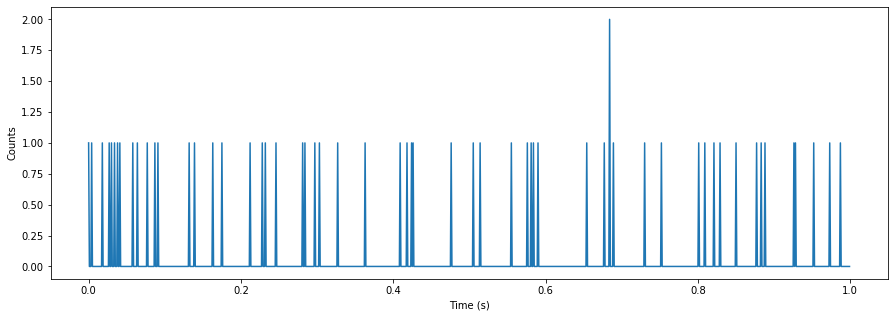

In [80]:
df = pd.read_csv(os.path.join(shift.time_stamp_files_folder_path, "cache", 'osc_test_data_set_003.csv'))
marker_idx = df[df['channel'] == 5].index[0]
df = df.loc[marker_idx+1:, :]
df = df[df['channel'] == 2].reset_index(drop=True)
df['time_sec'] = iota_period_sec * df['revolution']
df['time_sec'] -= df['time_sec'].iloc[0]

tmax = 1 # sec
dt = 1e-3 # sec

df = df[df['time_sec'] < tmax]

res = df.groupby((df['time_sec']/dt).astype(int)).apply(lambda x: len(x.index))
res_idx = np.arange(int(tmax/dt))
res_counts = np.zeros(shape=res_idx.shape)
res_counts[res.index] = res

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(dt * res_idx, res_counts)
ax.set_ylabel('Counts')
ax.set_xlabel('Time (s)')
plt.show()

In [70]:
res.index

Int64Index([   0,    4,   18,   27,   30,   34,   38,   41,   58,   64,
            ...
            6589, 6593, 6630, 6669, 6753, 6766, 6784, 6789, 6801, 6820],
           dtype='int64', name='time_sec', length=405)